# Simple Linear Regression from Scratch

In [1]:
import numpy as np
import pandas as pd

## Mathematics

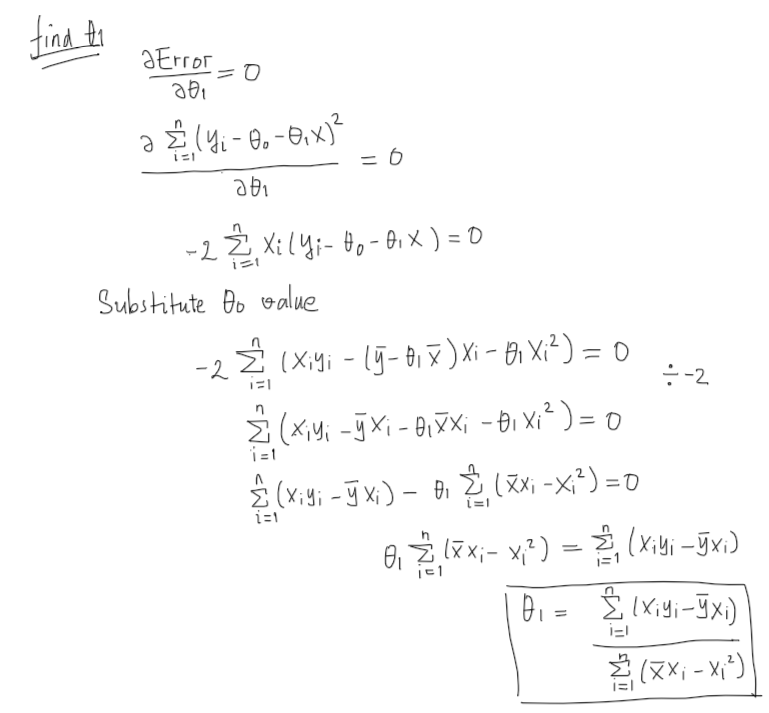

In [2]:
class LinearRegression:
    def __init__(self):
        self.coef_=0
        self.intercept_=0
    
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(0,X_train.shape[0]):
            num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den=den+ (X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())
        self.coef_=num/den
        self.intercept_=self.coef_*X_train.mean()+y_train.mean()
            
    def predict(self,X_train):
         return self.coef_*X_train+self.intercept_

In [3]:
df=pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
X=df.iloc[:,1].values
y=df.iloc[:,2].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [7]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('Prediction=',lr.predict(1))
print('Slope=',lr.coef_)
print('Intercept=',lr.intercept_)

Prediction= 125663.80843348407
Slope= 9371.016079696603
Intercept= 116292.79235378746


# Metrics Measure From Scratch

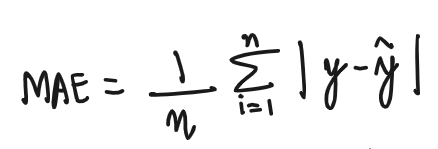

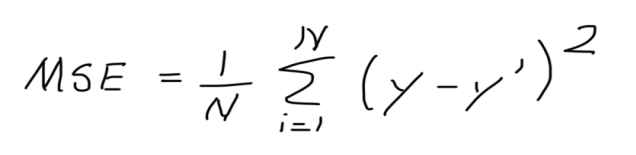

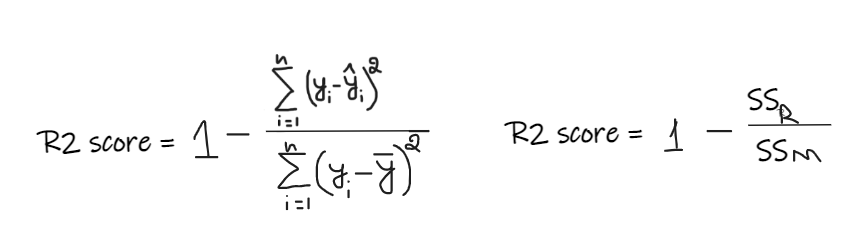

In [8]:
class Measure:
    def MAE(self,y_test,y_pred):
        ae=0
        for i in range(0,X_test.shape[0]):
            ae=ae+abs(y_test[i]-y_pred[i])
        return ae/y_test.shape[0]
    def MSE(self,y_test,y_pred):
        se=0
        for i in range(0,X_test.shape[0]):
            se=se+((y_test[i]-y_pred[i])*(y_test[i]-y_pred[i]))
        return se/y_test.shape[0]
    def R2Score(self,y_test,y_pred):
        ssr=0
        ssm=0
        y_mean=y_test.mean()
        for i in range(0,X_test.shape[0]):
            ssr=ssr+((y_test[i]-y_pred[i])*(y_test[i]-y_pred[i]))
            ssm=ssm+((y_test[i]-y_mean)*(y_test[i]-y_mean))
        return 1-(ssr/ssm)

In [9]:
acc=Measure()
mae=acc.MAE(y_test,y_pred)
mse=acc.MSE(y_test,y_pred)
r2=acc.R2Score(y_test,y_pred)
print(mae,mse,r2)

88999.98979871298 7952234000.5614395 -12.378330878259256


# Multiple Linear Regression from Scratch

## Mathematics

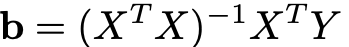

In [23]:
class LinearRegression:
    def __init__(self):
        self.intercept_=None
        self.coef_=None
    
    def fit(self,X_train,X_test):
        X_train=np.insert(X_train,0,1,axis=1)
        beta=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_=beta[0]
        self.coef_=beta[1:]
    
    def predict(self,X_train):
        return np.dot(X_train,self.coef_)+self.intercept_
        

In [14]:
df=pd.read_csv('/kaggle/input/netflix-stock-price-prediction/NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [16]:
X=df[['Open','High','Low','Volume']]
y=df[['Close']]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [28]:
lr=LinearRegression()
lr.fit(X_train,y_train)

In [31]:
y_pred=lr.predict(X_test)

In [42]:
acc=Measure()
mae=acc.MAE(y_test.values,y_pred)
mse=acc.MSE(y_test.values,y_pred)
r2=acc.R2Score(y_test.values,y_pred)
print('MAE:',mae,'MSE:',mse,'R2 Score:',r2)

MAE: [2.85718653] MSE: [15.9769461] R2 Score: [0.99862977]
